In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels as sm

%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv("Dados/housing.csv")
dados

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Dados 

In [3]:
dados.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
dados.shape

(20640, 10)

In [5]:
dados.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
dados.columns = ["longitude", "latitude", "habitação", "total quartos", "quartos dormir",  "população", "domicílios", "renda", "valor casa", "proximidade do oceano"]
dados.head(10)

,longitude,latitude,habitação,total quartos,quartos dormir,população,domicílios,renda,valor casa,proximidade do oceano
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [7]:
dados["renda"].median()

3.5347999999999997

In [13]:
dados["renda"].min()

0.4999

In [14]:
dados["renda"].max()

15.0001

In [9]:
dados["valor casa"].mean()

206855.81690891474

In [10]:
dados["valor casa"].mode()

0    500001.0
dtype: float64

In [15]:
dados["total quartos"].std()

2181.615251582787

Text(0.5, 1.0, 'Renda de Habilitação')

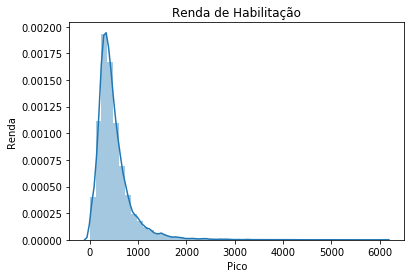

In [16]:
ax = sns.distplot(dados.domicílios)
ax.set(xlabel="Pico", ylabel="Renda")
ax.set_title("Renda de Habilitação")

Text(0.5, 1.0, 'Grafico de população de São Francisco')

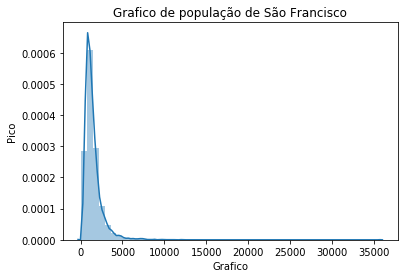

In [17]:
ax = sns.distplot(dados.população)
ax.set(xlabel="Grafico", ylabel="Pico")
ax.set_title("Grafico de população de São Francisco")

Text(0.5, 1.0, 'População de São Francisco')

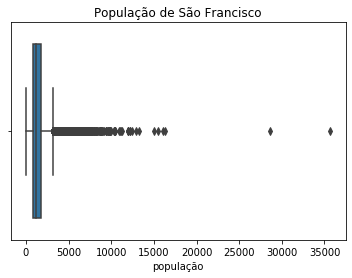

In [18]:
df = sns.boxplot(x=dados.população)
df.set_title("População de São Francisco")

Text(0.5, 1.0, 'Domicílios em SF')

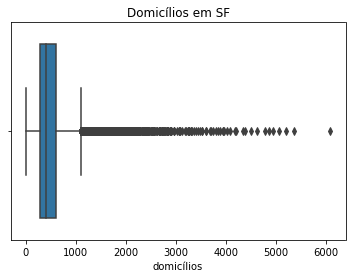

In [19]:
df = sns.boxplot(x=dados.domicílios)
df.set_title("Domicílios em SF")

In [20]:
dados2 = dados.query("domicílios >= 10")
dados.describe()

,longitude,latitude,habitação,total quartos,quartos dormir,população,domicílios,renda,valor casa
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [21]:
dados2 = dados.query("população >= 10")
dados2.describe()

,longitude,latitude,habitação,total quartos,quartos dormir,população,domicílios,renda,valor casa
count,20631.000000,20631.000000,20631.000000,20631.000000,20424.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,-119.570372,35.632191,28.644273,2636.904852,538.105709,1426.095487,499.756047,3.871694,206865.835927
std,2.003233,2.136093,12.581924,2181.405871,421.328936,1132.321471,382.272734,1.899492,115389.418678
min,-124.350000,32.540000,1.000000,8.000000,1.000000,11.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1448.500000,296.000000,788.000000,280.000000,2.564350,119650.000000
50%,-118.500000,34.260000,29.000000,2127.000000,435.000000,1166.000000,410.000000,3.535300,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743850,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Text(0.5, 1.0, 'Domicílios em São Francisco')

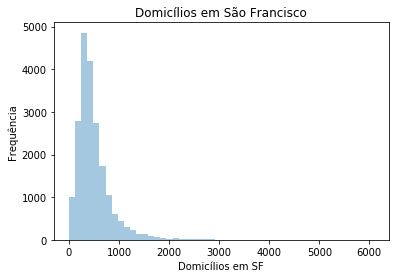

In [22]:
df = sns.distplot(dados.domicílios, norm_hist = False, kde = False)
df.set(xlabel="Domicílios em SF", ylabel="Frequência")
df.set_title("Domicílios em São Francisco")

Text(0.5, 1.0, 'População em São Francisco')

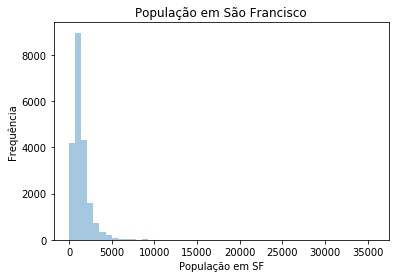

In [23]:
df = sns.distplot(dados.população, norm_hist = False, kde = False)
df.set(xlabel="População em SF", ylabel="Frequência")
df.set_title("População em São Francisco")

Text(0.5, 1, 'Média de domicílios de SF')

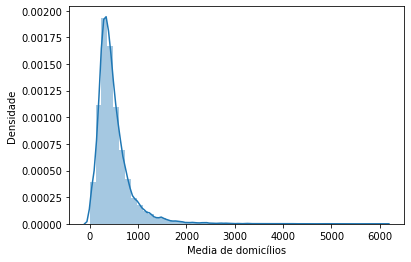

In [24]:
df = sns.distplot(dados2.domicílios)
df.set(xlabel="Media de domicílios", ylabel="Densidade")
ax.set_title("Média de domicílios de SF")

Text(0.5, 1.0, 'Media da população de SF')

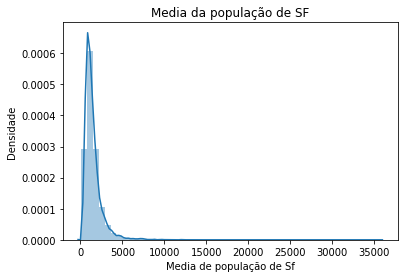

In [25]:
df = sns.distplot(dados2.população)
df.set(xlabel="Media de população de Sf", ylabel="Densidade")
df.set_title("Media da população de SF")

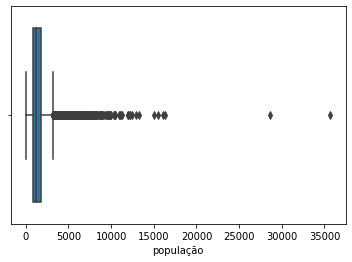

In [26]:
df = sns.boxplot(x=dados2.população)

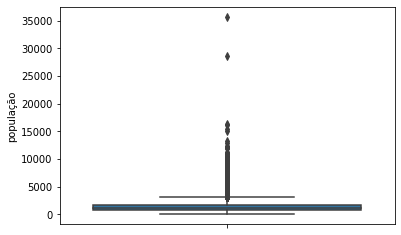

In [27]:
df = sns.boxplot(y=dados2.população)

**Mapa**

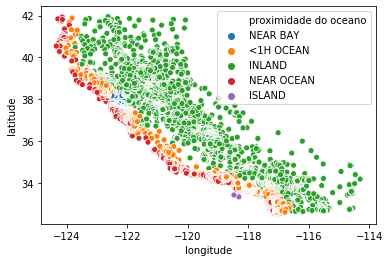

In [28]:
dados = sns.scatterplot(x="longitude", y="latitude", hue="proximidade do oceano", data=dados)